# K-Means Clustering



**To Demonstrate and Analyze the performance of three Clustering Algorithms:
          K-Means, Agglomerative Clustering, and DBSCAN, on the standard dataset.**

In [ ]:
import pandas as pd # import pandas for data manipulation
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y_true = iris.target
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Setting up clustering models
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
# Fitting the models and predicting clusters
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
#  Define a function to calculate accuracy by mapping cluster labels to true labels
def calculate_cluster_accuracy(y_true, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for i in np.unique(cluster_labels):
        mask = cluster_labels == i
        labels[mask] = mode(y_true[mask])[0]
    return accuracy_score(y_true, labels)

In [ ]:
kmeans_accuracy = calculate_cluster_accuracy(y_true, kmeans_labels)
agg_accuracy = calculate_cluster_accuracy(y_true, agg_labels)
dbscan_accuracy = calculate_cluster_accuracy(y_true, dbscan_labels)

In [ ]:
print("Silhouette Score for k-Means:", silhouette_score(X_scaled, kmeans_labels))
print("Accuracy for k-Means:", kmeans_accuracy)

print("\nSilhouette Score for Agglomerative Clustering:", silhouette_score(X_scaled, agg_labels))
print("Accuracy for Agglomerative Clustering:", agg_accuracy)

# DBSCAN often has outliers labeled as -1, so we need to filter both data and labels
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan_labels != -1] = True
dbscan_silhouette = silhouette_score(X_scaled[core_samples_mask], dbscan_labels[core_samples_mask])

print("\nSilhouette Score for DBSCAN (excluding noise):", dbscan_silhouette)
print("Accuracy for DBSCAN:", dbscan_accuracy)

Silhouette Score for k-Means: 0.4798814508199817
Accuracy for k-Means: 0.6666666666666666

Silhouette Score for Agglomerative Clustering: 0.4466890410285909
Accuracy for Agglomerative Clustering: 0.8266666666666667

Silhouette Score for DBSCAN (excluding noise): 0.6558885287002016
Accuracy for DBSCAN: 0.68


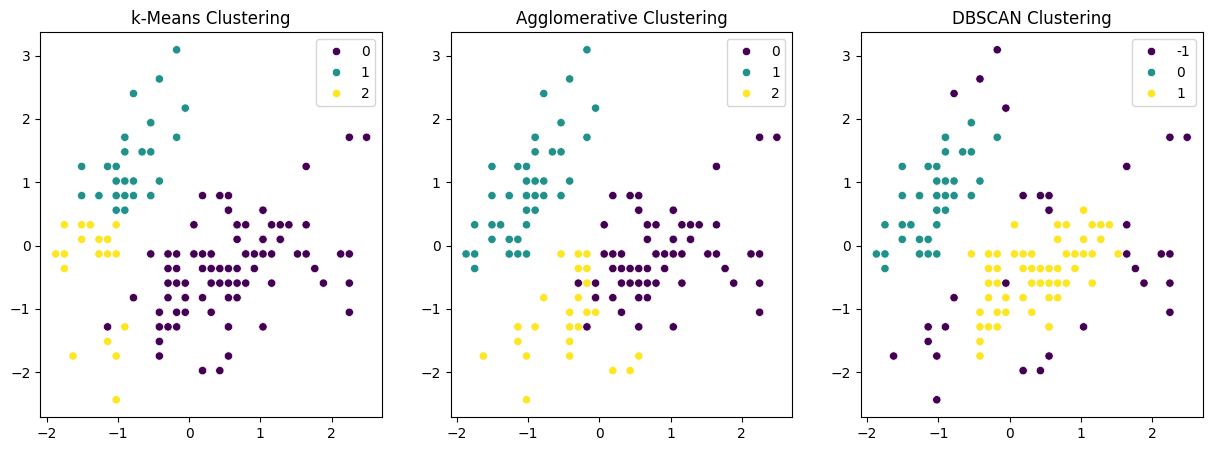

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# k-Means plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette="viridis", ax=axs[0])
axs[0].set_title("k-Means Clustering")

# Agglomerative Clustering plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette="viridis", ax=axs[1])
axs[1].set_title("Agglomerative Clustering")

# DBSCAN plot
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette="viridis", ax=axs[2])
axs[2].set_title("DBSCAN Clustering")

plt.show()